**Generate 2d dataset**

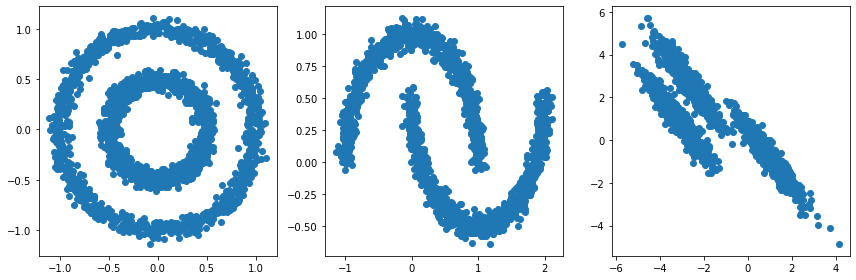

In [1]:
import matplotlib.pyplot as plt
from sklearn import cluster, datasets
import numpy as np

n_samples = 2000
np.random.seed(0)
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

sample_datasets = [noisy_circles, noisy_moons, aniso]

figsize = 4
plt.figure(figsize=(figsize*len(sample_datasets),figsize))
for i, dataset in enumerate(sample_datasets):
  plt.subplot(1, len(sample_datasets), i+1)
  plt.scatter(dataset[0][:, 0], dataset[0][:, 1])
  plt.tight_layout()

plt.show()

**Clustering**

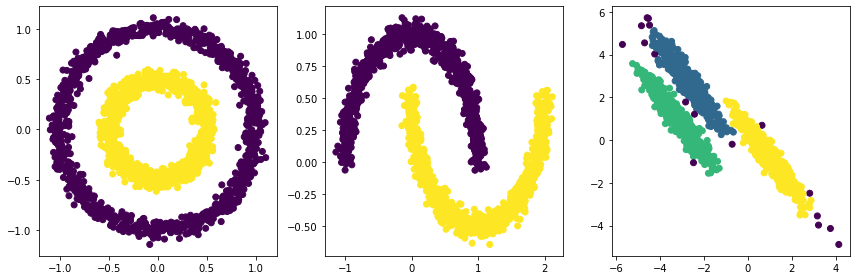

In [2]:
figsize = 4
plt.figure(figsize=(figsize*len(sample_datasets),figsize))
eps_values = [0.2, 0.25, 0.25]
min_samples = [3, 3, 3]

for i, dataset in enumerate(sample_datasets):
  X = dataset[0]
  y_pred = cluster.DBSCAN(eps=eps_values[i], min_samples=min_samples[i]).fit_predict(X)
  plt.subplot(1, len(sample_datasets), i+1)
  plt.scatter(dataset[0][:, 0], dataset[0][:, 1], c=y_pred)
  plt.tight_layout()

plt.show()

**Evaluation**

In [3]:
# download evaluation.py from my github page to use in colab machine
!curl https://raw.githubusercontent.com/hamidsadeghi68/face-clustering/main/evaluation.py

from sklearn import metrics

def calculate_f_measure(labels_true, labels_pred, beta=1.0):
  [[tn, fp], [fn, tp]] = metrics.cluster.pair_confusion_matrix(labels_true, labels_pred)
  precision = tp/(tp + fp)
  recall = tp/(tp + fn)
  f_measure = (beta*beta + 1)*precision*recall/(beta*beta*precision + recall)
  return f_measure

def evaluate_clustering(labels, predictions, beta=1.0):
  rand_index = metrics.rand_score(labels, predictions)
  nmi = metrics.normalized_mutual_info_score(labels, predictions)
  f_measure = calculate_f_measure(labels, predictions, beta=beta)
  print('Rand Index: %f, NMI: %f, F-measure: %f' % (rand_index, nmi, f_measure))
  return


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0   674    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   674  100   674    0     0    993      0 --:--:-- --:--:-- --:--:--   994


In [5]:
from evaluation import evaluate_clustering
evaluate_clustering(y, y_pred)

Rand Index: 0.994349, NMI: 0.975012, F-measure: 0.991444
